<a href="https://colab.research.google.com/github/falahamro/Identity_mapping/blob/main/LIWC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Psycholinguistic Analysis: we use the Linguistic Inquiry Word Count (LIWC) for psychometric analysis on the conversational discourse of the entire dataset. LIWC can help uncover linguistic and psychological patterns from users' discourse. For this analysis, we separated messages by clusters and applied the LIWC dictionary on each cluster. Next, we focus our attention on interpreting the observable psychological state of our clusters based on the LIWC psychometrics output.
    
First, cluster 0 messages tend to avoid using affective, anxiety, and anger related words but more sad and negative emotions words in general. This characterization can be explained by their narrative being neutral. As previously explained, we observed users' discourse in this class tend to have mainly positive sentiment. Additionally, discourse analysis revealed that major news channels contributed to the narrative. Coupled with the characterization that they attempted to portray a positive image of the demonstrations, we postulate these factors may have contributed to the native of the terms used. Another observable characteristic of cluster 0 messages is the mix usage of drives related terms. Specifically, we observe they use high risk, achievement, reward but low affiliation and power related words. This can be associated with the far right wing news channels agendas at the time; to convince the general public that the elections were rigged and prevent the incumbent president from being sworn in. 

Second, unlike cluster 0, users in cluster 1 tend to write with greater affectiveness and sadness in their messages. They however exhibit the same characteristics in using words expressing anger, and anxiety. This narrative characterization can be associated with the relatively low sentiment in their discourse as observed previously from the subjectivity measures. Greater expressions of drive related terms in general, affiliation, reward, and power terms are highly observable in cluster 1 messages; a characteristic lacking in both cluster 0, and 2. This distinctive observation can be explained by their notable high reach level and explicit violent political discussions, which were centered around advancing the narrative rhetoric surrounding the election results. Although they have a high tendency to use drive related terms, they use lower risk and achieve related terms which can be associated with low sociability level. 

Finally, cluster 2 users can be characterized with greater expression of anger and high anxiety related messages but avoid affective, negative, and sad emotion related terms. Similar to cluster 0, we observe they use lower drives related messages in general, but low risk and power messages, and average affiliation and achievement messages. While greater expressions of anger and anxiety can be explained with the significantly low sentiment scores as measured by sentiment analysis; the greater negativity expressions measured by LIWC contractics our findings. Furthermore, we postulated in our prior analysis that users in this class can be characterized by their high sociability level, coupled with topical analysis which revealed their discourse was centered around rallies. LIWC analysis reveals contracting observations on their attributes. These findings open the door for more investigation towards further explainability of their psychological characterization. 




In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive

In [5]:
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
liwc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LIWC Analysis/LIWCResults.csv")

In [7]:
liwc = liwc.rename(columns={'Filename':'Kmeans'})

In [8]:
liwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kmeans        3 non-null      int64  
 1   Segment       3 non-null      int64  
 2   WC            3 non-null      int64  
 3   Analytic      3 non-null      float64
 4   Clout         3 non-null      float64
 5   Authentic     3 non-null      float64
 6   Tone          3 non-null      float64
 7   WPS           3 non-null      float64
 8   Sixltr        3 non-null      float64
 9   Dic           3 non-null      float64
 10  function      3 non-null      float64
 11  pronoun       3 non-null      float64
 12  ppron         3 non-null      float64
 13  i             3 non-null      float64
 14  we            3 non-null      float64
 15  you           3 non-null      float64
 16  shehe         3 non-null      float64
 17  they          3 non-null      float64
 18  ipron         3 non-null      floa

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x = liwc[['Kmeans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'swear']]


sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
df = liwc.drop('Kmeans', axis= 1)

In [12]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, liwc.Kmeans), 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  


In [13]:
df_norm

,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,Kmeans
0,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.288288,0.000000,1.00000,1.000000,...,0.0,0.897436,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1
1,NaN,0.000000,0.834302,0.000000,0.714286,0.000000,0.000000,0.728571,0.83913,0.538462,...,0.5,0.000000,0.8,0.196429,0.000000,0.954545,0.076923,1.0,0.230159,0
2,NaN,0.827607,1.000000,0.270833,1.000000,0.533708,1.000000,1.000000,0.00000,0.000000,...,1.0,1.000000,0.0,0.000000,0.363636,1.000000,1.000000,1.0,1.000000,2


In [14]:
liwc = df_norm

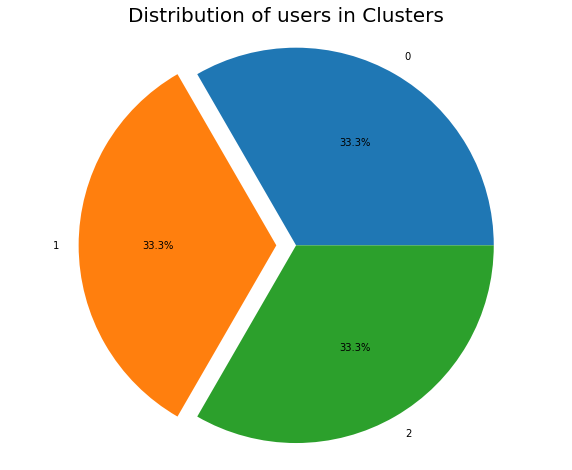

In [15]:
labels = '0', '1', '2'
sizes = [liwc.Kmeans[liwc['Kmeans']==0].count(), liwc.Kmeans[liwc['Kmeans']==1].count(), liwc.Kmeans[liwc['Kmeans']==2].count()]
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=(0, 0.1, 0), labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Distribution of users in Clusters", size = 20)
plt.show()

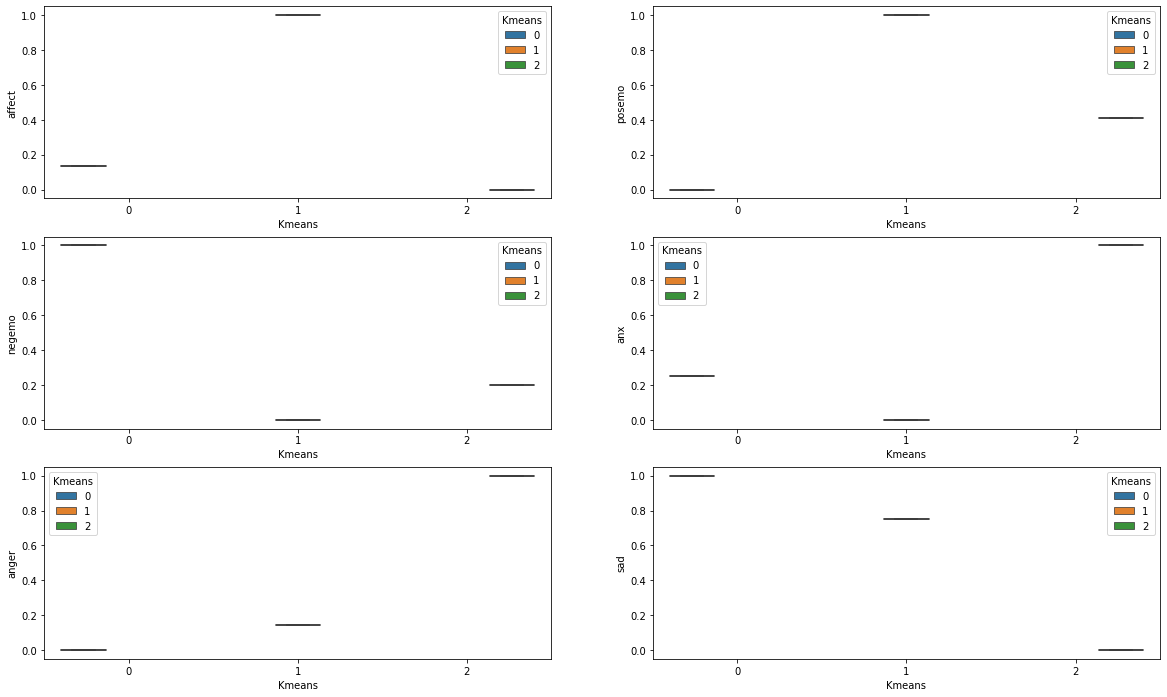

In [16]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='affect',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[0][0])
sns.boxplot(y='posemo',x = 'Kmeans', hue = 'Kmeans',data = liwc , ax=axarr[0][1])
sns.boxplot(y='negemo',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][0])
sns.boxplot(y='anx',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][1])
sns.boxplot(y='anger',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][0])
sns.boxplot(y='sad',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][1])

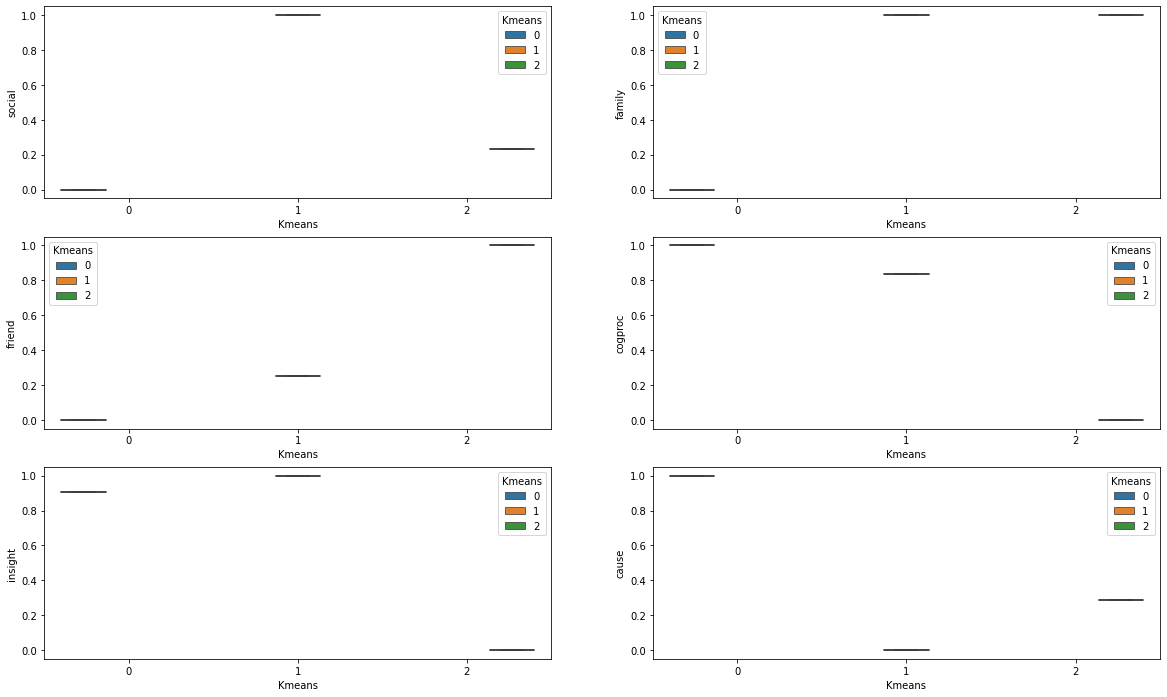

In [17]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='social',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[0][0])
sns.boxplot(y='family',x = 'Kmeans', hue = 'Kmeans',data = liwc , ax=axarr[0][1])
sns.boxplot(y='friend',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][0])
sns.boxplot(y='cogproc',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][1])
sns.boxplot(y='insight',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][0])
sns.boxplot(y='cause',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][1])

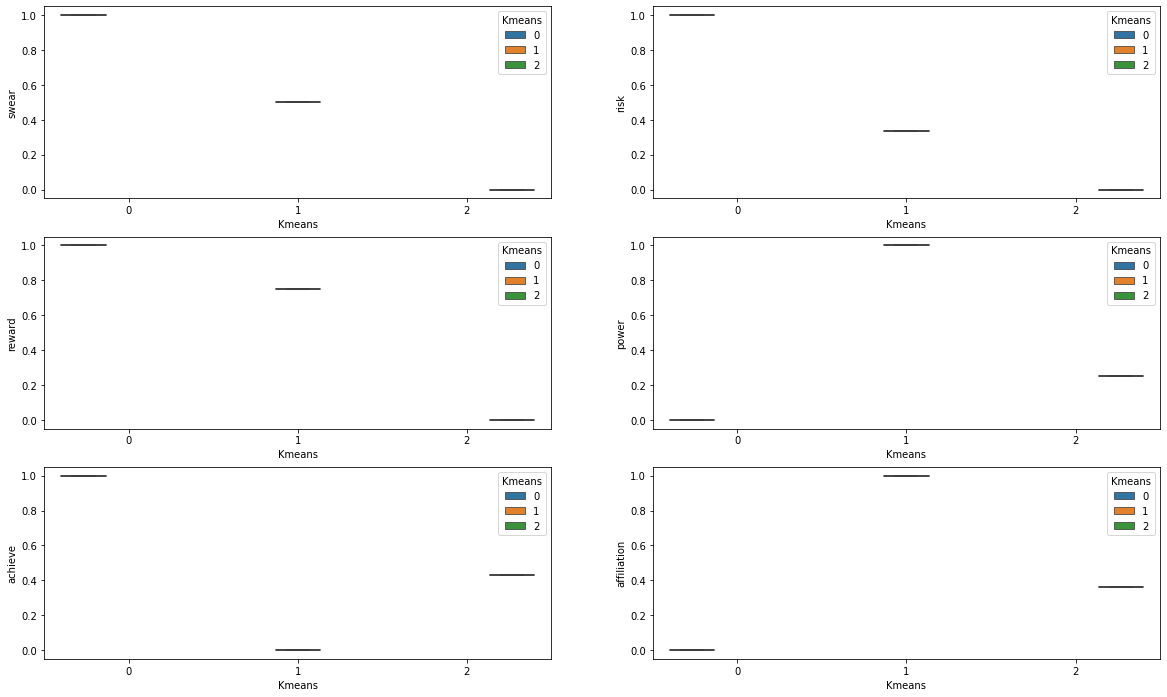

In [18]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='swear',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[0][0])
sns.boxplot(y='risk',x = 'Kmeans', hue = 'Kmeans',data = liwc , ax=axarr[0][1])
sns.boxplot(y='reward',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][0])
sns.boxplot(y='power',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][1])
sns.boxplot(y='achieve',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][0])
sns.boxplot(y='affiliation',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][1])

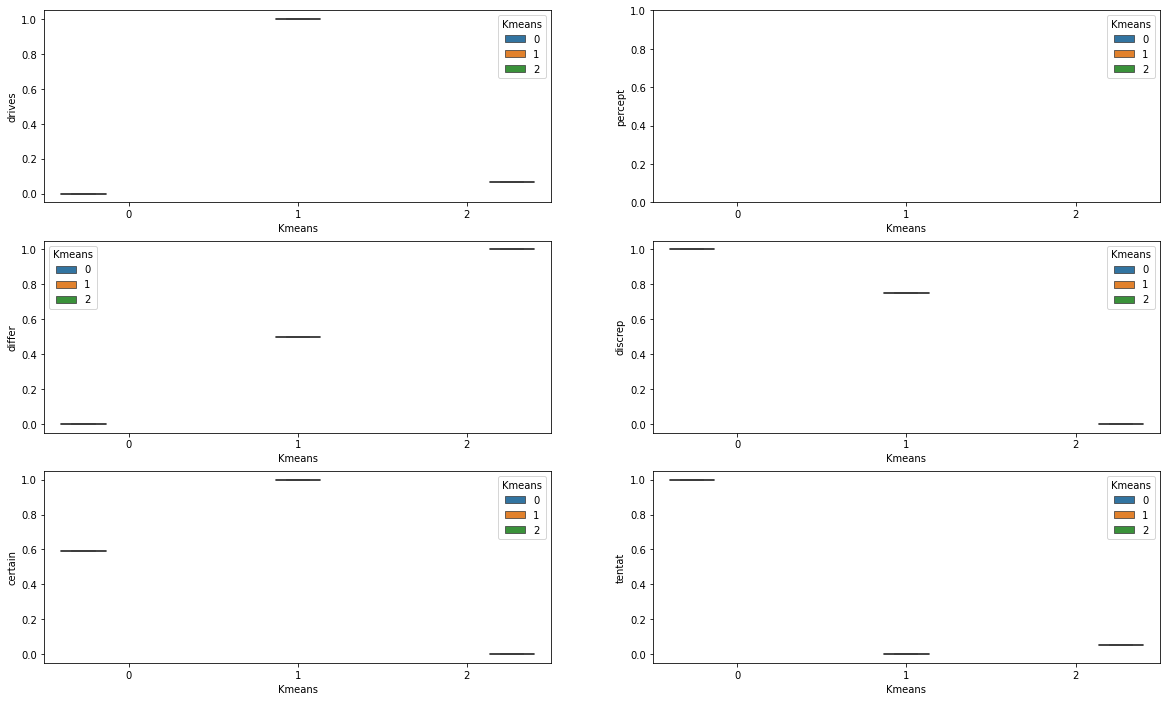

In [19]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='drives',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[0][0])
sns.boxplot(y='percept',x = 'Kmeans', hue = 'Kmeans',data = liwc , ax=axarr[0][1])
sns.boxplot(y='differ',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][0])
sns.boxplot(y='discrep',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[1][1])
sns.boxplot(y='certain',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][0])
sns.boxplot(y='tentat',x = 'Kmeans', hue = 'Kmeans',data = liwc, ax=axarr[2][1])

In [20]:
liwc = liwc[['Kmeans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'swear']]

In [21]:
liwc

,Kmeans,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,certain,differ,percept,drives,affiliation,achieve,power,reward,risk,swear
0,1,1.000000,1.000000,0.0,0.00,0.142857,0.75,1.000000,1.0,0.25,...,1.000000,0.5,NaN,1.000000,1.0000,0.000000,1.00,0.75,0.333333,0.5
1,0,0.133333,0.000000,1.0,0.25,0.000000,1.00,0.000000,0.0,0.00,...,0.592593,0.0,NaN,0.000000,0.0000,1.000000,0.00,1.00,1.000000,1.0
2,2,0.000000,0.411765,0.2,1.00,1.000000,0.00,0.230769,1.0,1.00,...,0.000000,1.0,NaN,0.064103,0.3625,0.428571,0.25,0.00,0.000000,0.0


In [22]:
liwc[['affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'swear']].mean()

affect         0.377778
posemo         0.470588
negemo         0.400000
anx            0.416667
anger          0.380952
sad            0.583333
social         0.410256
family         0.666667
friend         0.416667
cogproc        0.612613
insight        0.636364
cause          0.428571
discrep        0.583333
tentat         0.350000
certain        0.530864
differ         0.500000
percept             NaN
drives         0.354701
affiliation    0.454167
achieve        0.476190
power          0.416667
reward         0.583333
risk           0.444444
swear          0.500000
dtype: float64

In [23]:
liwc[['affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'swear']].std()

affect         0.542969
posemo         0.502588
negemo         0.529150
anx            0.520416
anger          0.540848
sad            0.520416
social         0.523605
family         0.577350
friend         0.520416
cogproc        0.536698
insight        0.552978
cause          0.515079
discrep        0.520416
tentat         0.563471
certain        0.502850
differ         0.500000
percept             NaN
drives         0.559764
affiliation    0.506263
achieve        0.501698
power          0.520416
reward         0.520416
risk           0.509175
swear          0.500000
dtype: float64

In [24]:
liwc

,Kmeans,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,certain,differ,percept,drives,affiliation,achieve,power,reward,risk,swear
0,1,1.000000,1.000000,0.0,0.00,0.142857,0.75,1.000000,1.0,0.25,...,1.000000,0.5,NaN,1.000000,1.0000,0.000000,1.00,0.75,0.333333,0.5
1,0,0.133333,0.000000,1.0,0.25,0.000000,1.00,0.000000,0.0,0.00,...,0.592593,0.0,NaN,0.000000,0.0000,1.000000,0.00,1.00,1.000000,1.0
2,2,0.000000,0.411765,0.2,1.00,1.000000,0.00,0.230769,1.0,1.00,...,0.000000,1.0,NaN,0.064103,0.3625,0.428571,0.25,0.00,0.000000,0.0


In [25]:
liwc[['affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'swear','Kmeans']].groupby("Kmeans").aggregate([np.mean, np.std])

affect        posemo     negemo       anx         anger      ...  \
            mean std      mean std   mean std  mean std      mean std  ...   
Kmeans                                                                 ...   
0       0.133333 NaN  0.000000 NaN    1.0 NaN  0.25 NaN  0.000000 NaN  ...   
1       1.000000 NaN  1.000000 NaN    0.0 NaN  0.00 NaN  0.142857 NaN  ...   
2       0.000000 NaN  0.411765 NaN    0.2 NaN  1.00 NaN  1.000000 NaN  ...   

         achieve     power     reward          risk     swear      
            mean std  mean std   mean std      mean std  mean std  
Kmeans                                                             
0       1.000000 NaN  0.00 NaN   1.00 NaN  1.000000 NaN   1.0 NaN  
1       0.000000 NaN  1.00 NaN   0.75 NaN  0.333333 NaN   0.5 NaN  
2       0.428571 NaN  0.25 NaN   0.00 NaN  0.000000 NaN   0.0 NaN  

[3 rows x 48 columns]

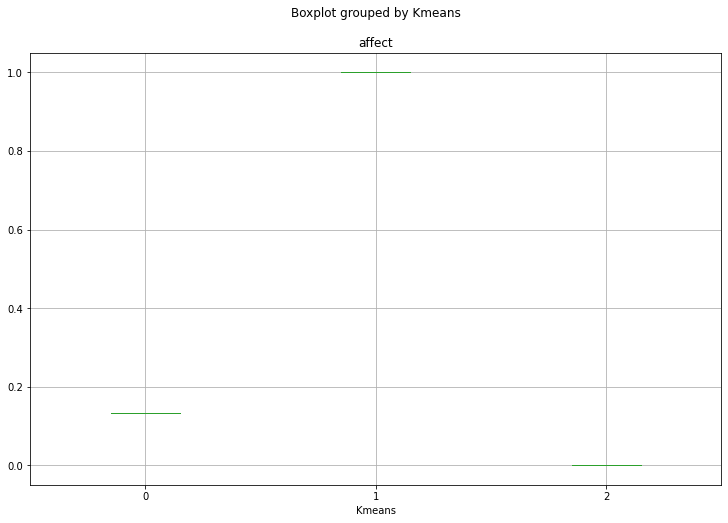

In [26]:
liwc.boxplot('affect', by='Kmeans', figsize=(12, 8))

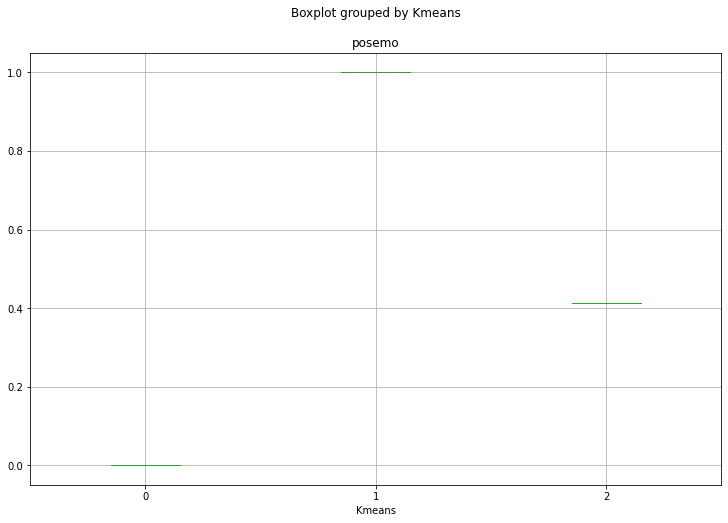

In [27]:
liwc.boxplot('posemo', by='Kmeans', figsize=(12, 8))

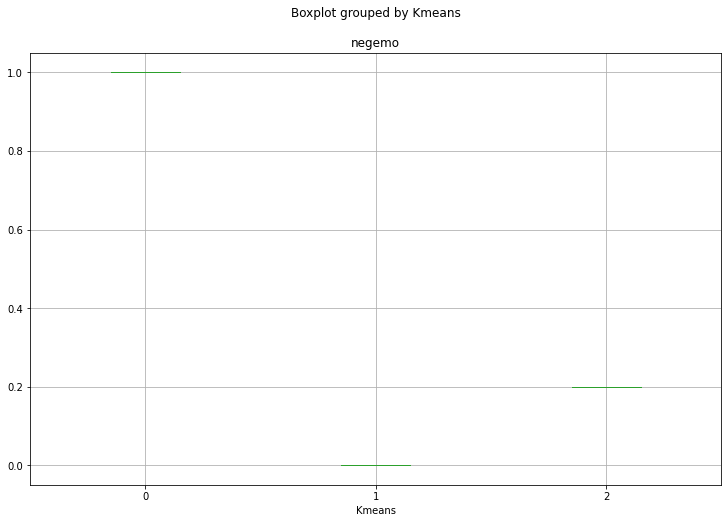

In [28]:
liwc.boxplot('negemo', by='Kmeans', figsize=(12, 8))

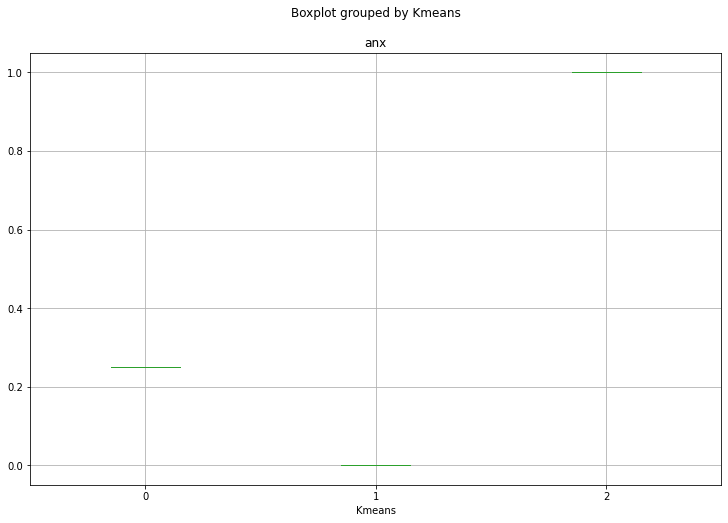

In [29]:
liwc.boxplot('anx', by='Kmeans', figsize=(12, 8))

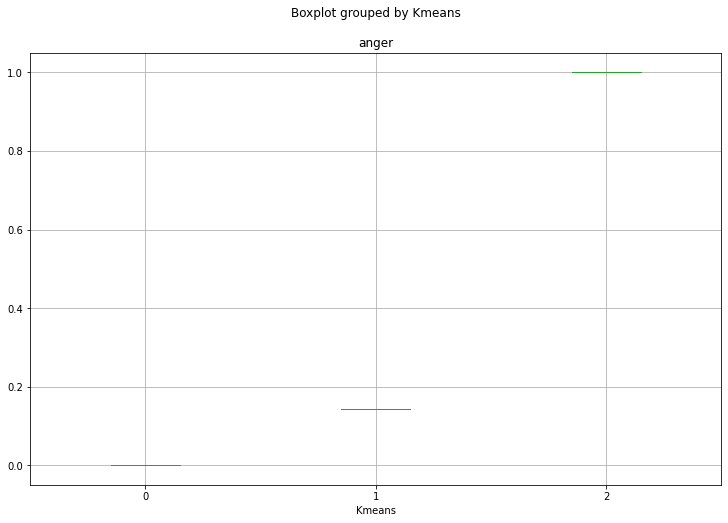

In [30]:
liwc.boxplot('anger', by='Kmeans', figsize=(12, 8))

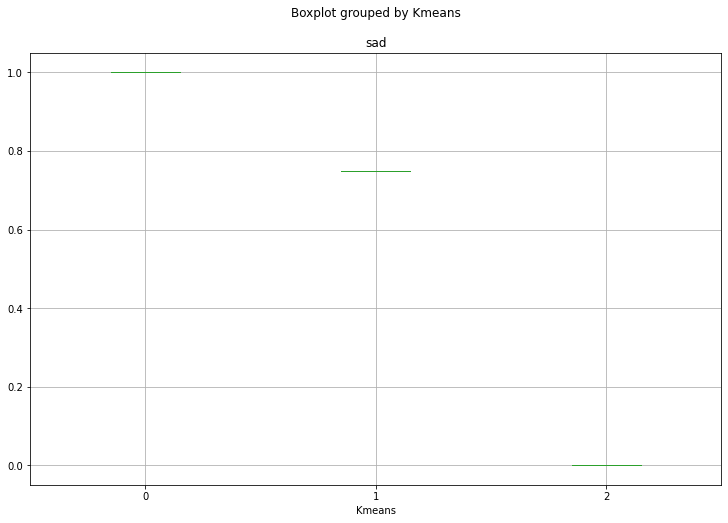

In [31]:
liwc.boxplot('sad', by='Kmeans', figsize=(12, 8))

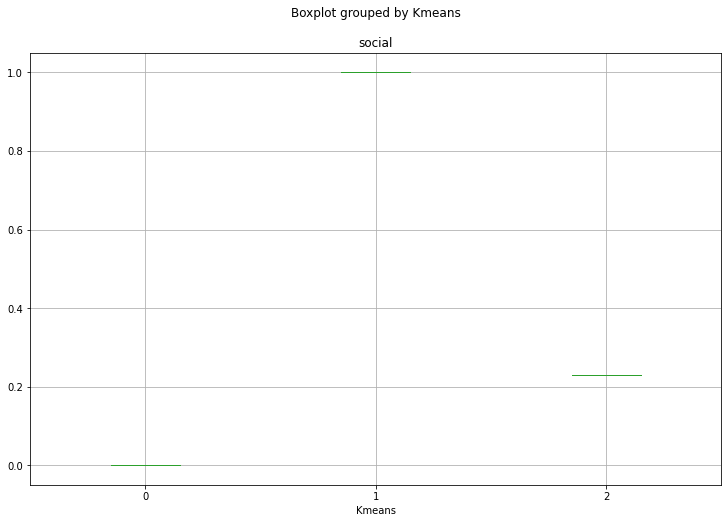

In [32]:
liwc.boxplot('social', by='Kmeans', figsize=(12, 8))

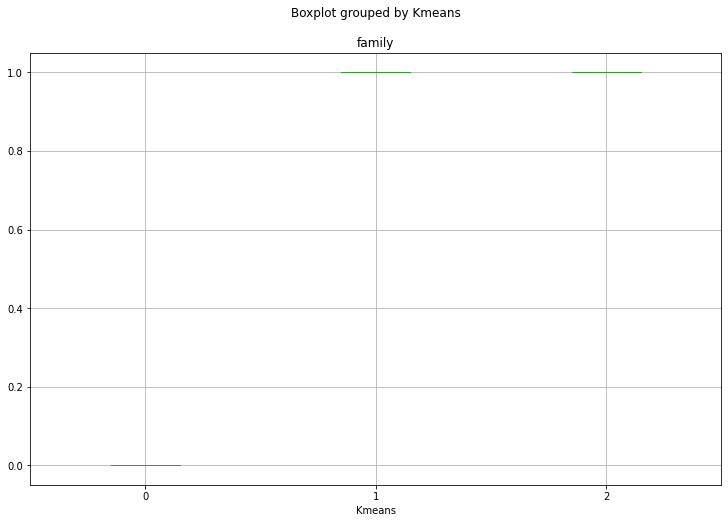

In [33]:
liwc.boxplot('family', by='Kmeans', figsize=(12, 8))

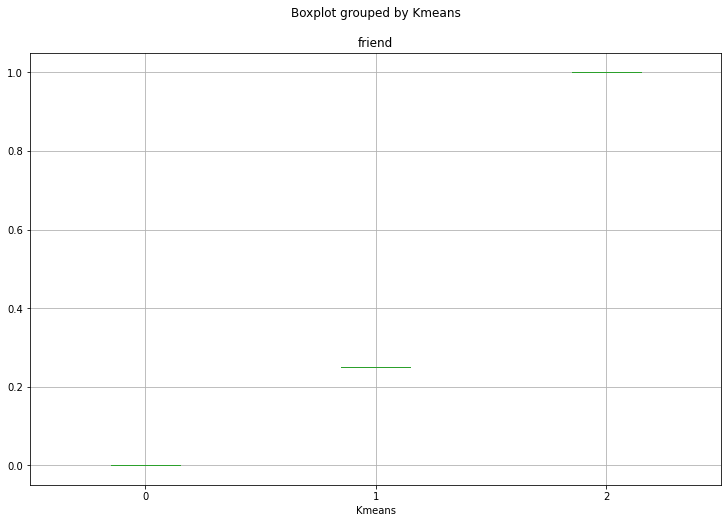

In [34]:
liwc.boxplot('friend', by='Kmeans', figsize=(12, 8))

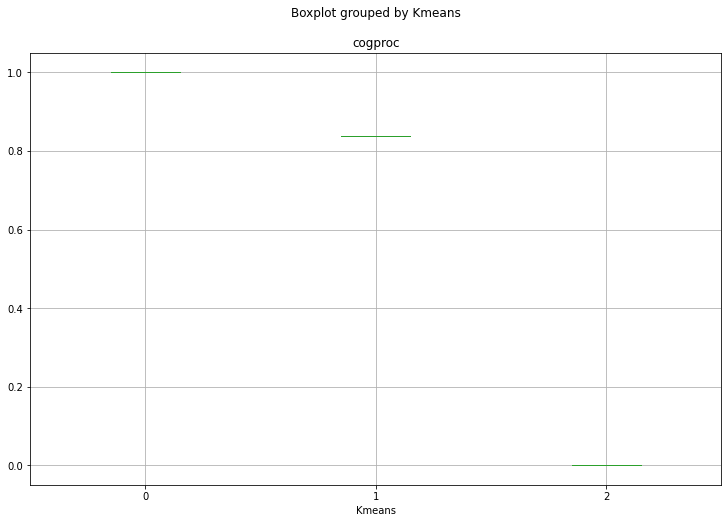

In [35]:
liwc.boxplot('cogproc', by='Kmeans', figsize=(12, 8))

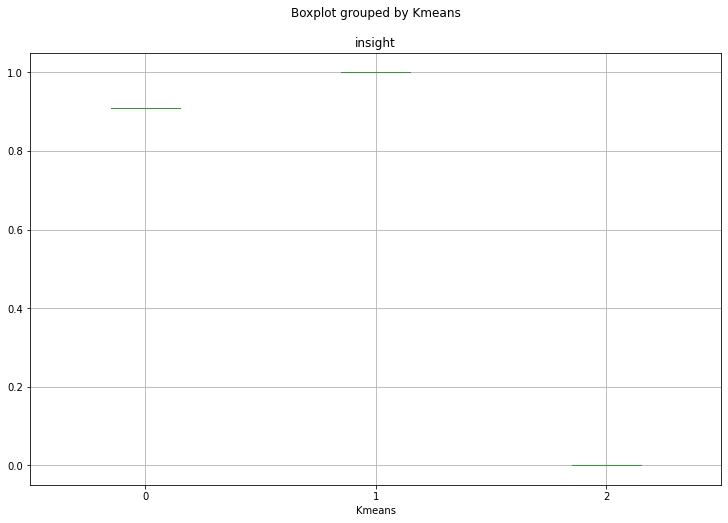

In [36]:
liwc.boxplot('insight', by='Kmeans', figsize=(12, 8))

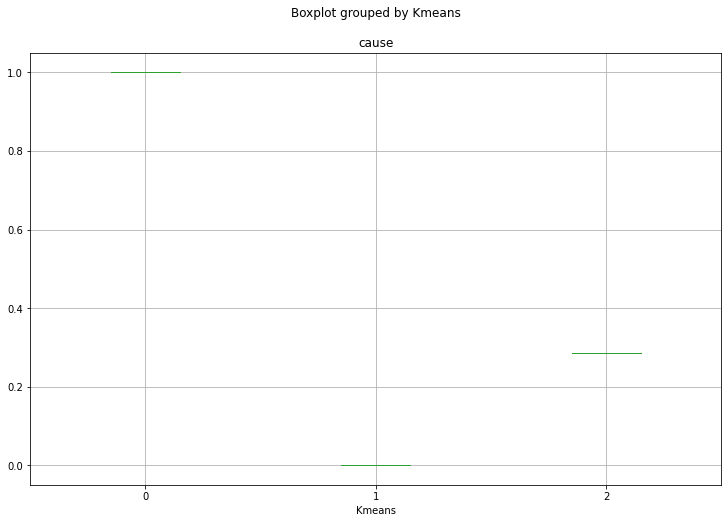

In [37]:
liwc.boxplot('cause', by='Kmeans', figsize=(12, 8))

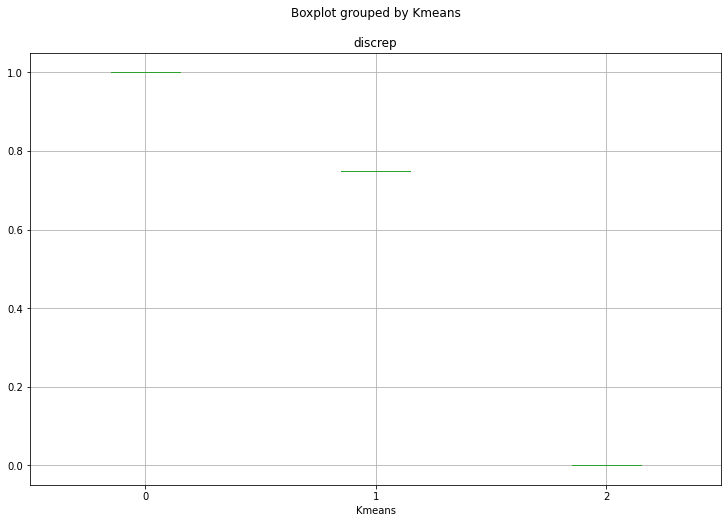

In [38]:
liwc.boxplot('discrep', by='Kmeans', figsize=(12, 8))

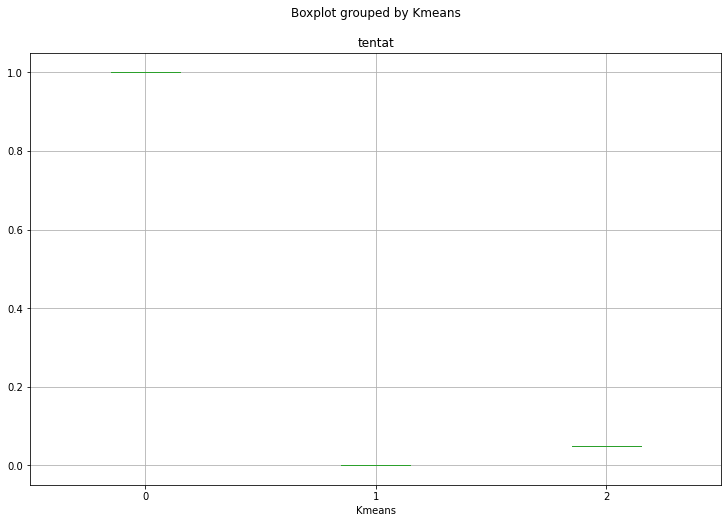

In [39]:
liwc.boxplot('tentat', by='Kmeans', figsize=(12, 8))

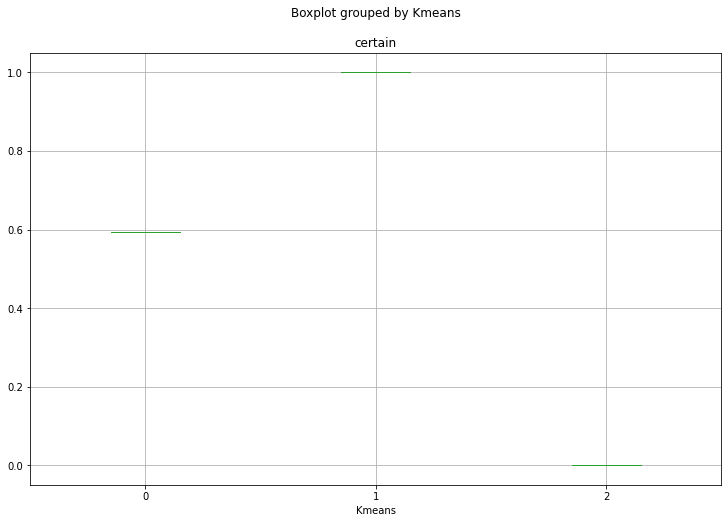

In [40]:
liwc.boxplot('certain', by='Kmeans', figsize=(12, 8))

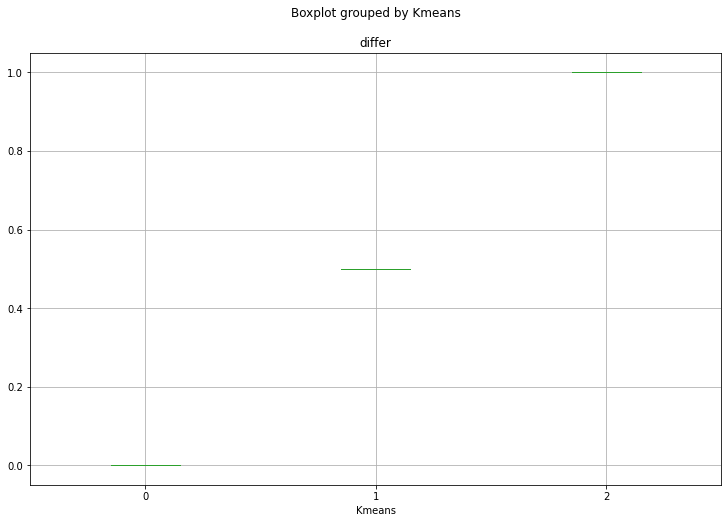

In [41]:
liwc.boxplot('differ', by='Kmeans', figsize=(12, 8))

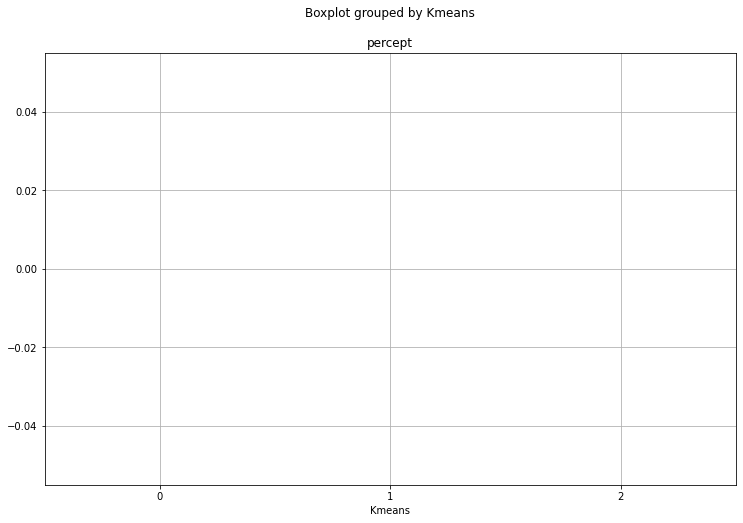

In [42]:
liwc.boxplot('percept', by='Kmeans', figsize=(12, 8))

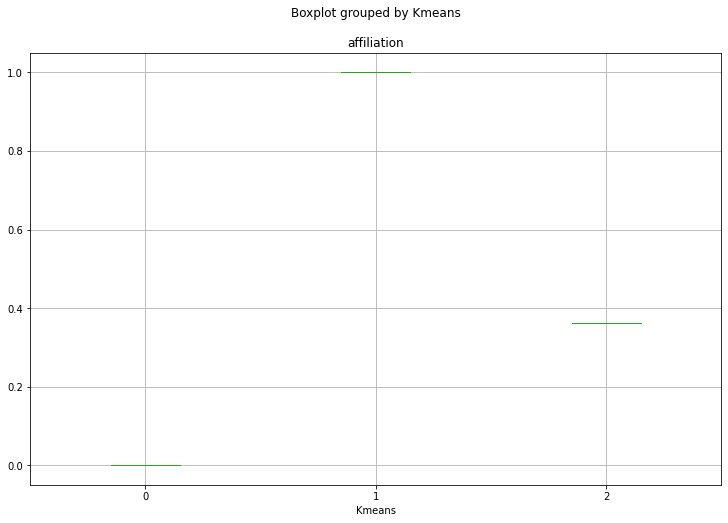

In [43]:
liwc.boxplot('affiliation', by='Kmeans', figsize=(12, 8))

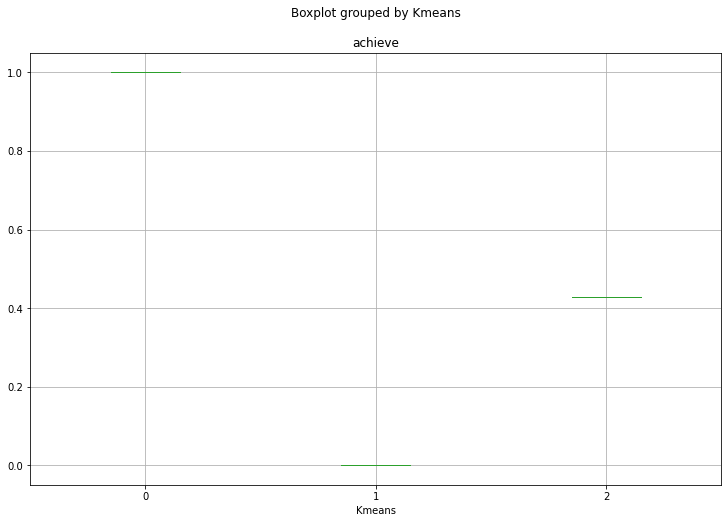

In [44]:
liwc.boxplot('achieve', by='Kmeans', figsize=(12, 8))

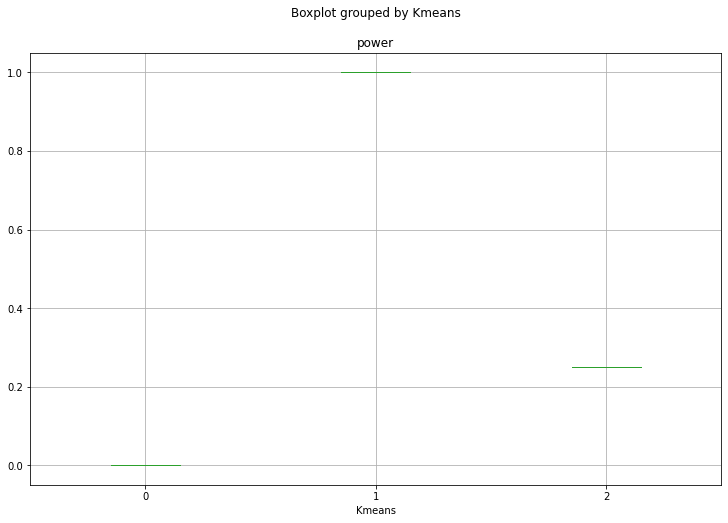

In [45]:
liwc.boxplot('power', by='Kmeans', figsize=(12, 8))

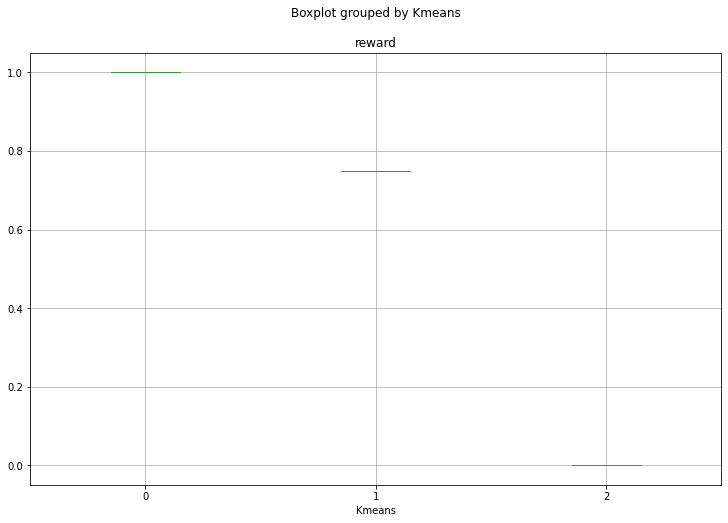

In [46]:
liwc.boxplot('reward', by='Kmeans', figsize=(12, 8))

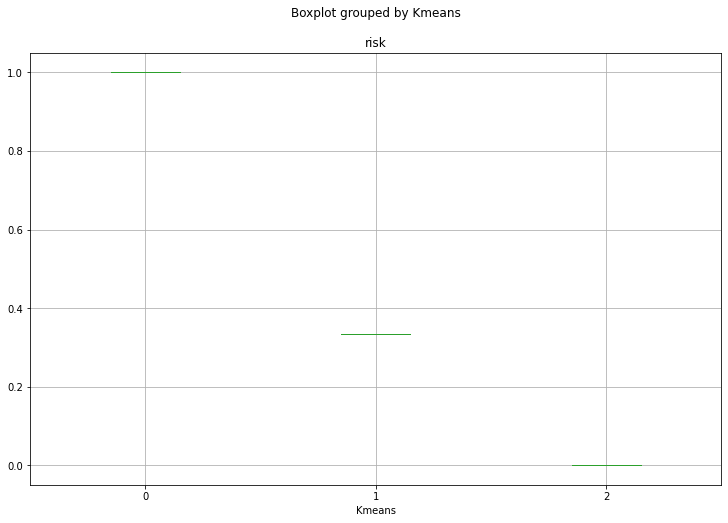

In [47]:
liwc.boxplot('risk', by='Kmeans', figsize=(12, 8))

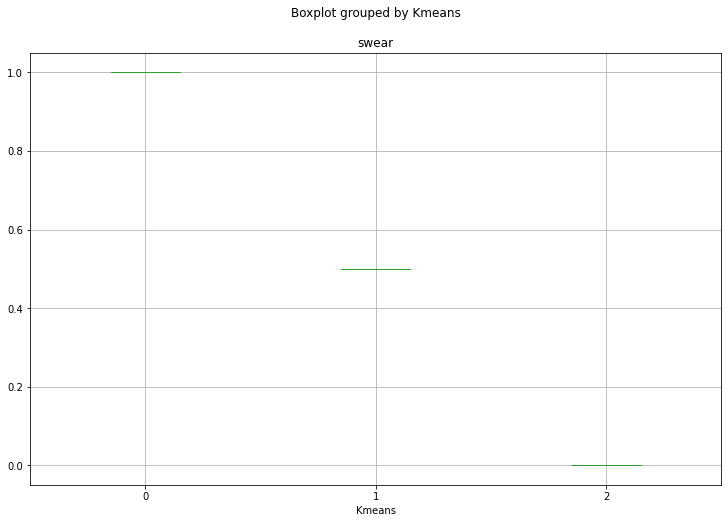

In [48]:
liwc.boxplot('swear', by='Kmeans', figsize=(12, 8))

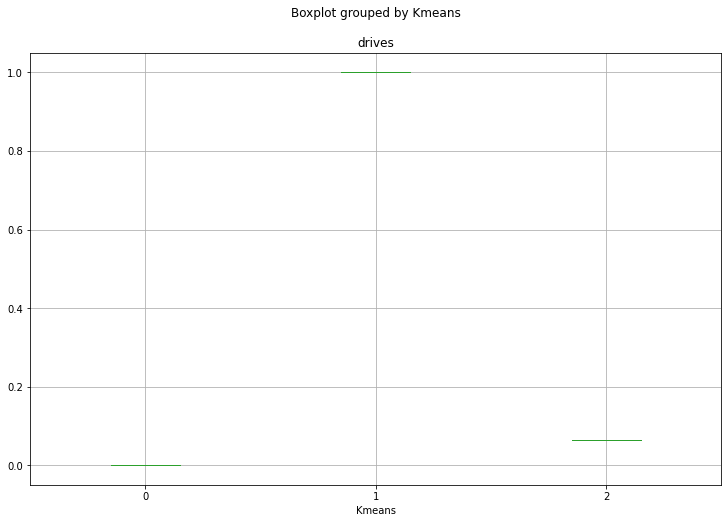

In [49]:
liwc.boxplot('drives', by='Kmeans', figsize=(12, 8))